# Problem statement
Over the years, Paris has faced alot of issues in relation to housing including:

    . Affordability
    . Supply and demand imbalance
    . Rising rent prices
    . Urbanization
    . Regulatory challenges
    . Social Housing Shortages
    . Market Speculation
    . Impact of External Events

In the face of burgeoning urban populations and evolving socio-economic dynamics, a distinguished group of investors seeks to establish a real estate 
firm in the vibrant city of Paris. They wish to address the pressing issue of affordable housing that has emerged as a critical challenge.
Due to the increased number of middle-class people who would also like the high-end properties in Paris, Mali Safi and sons has been engaged to
analyze existing data, draw meaningful insights, and guide their strategic decisions to affordable housing.

Essentially the real estate company wants:

i. To identify the variables affecting the prices 

ii. To construct a regression model that correlates the property prices with the variables
  
iii. To evaluate the performance of the regression model in identifying the factors affecting property prices.

# Data Understanding

In [143]:
#importing relevant modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [144]:
df = pd.read_csv('ParisHousing.csv')
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [145]:
#Checking the shape of the data
df.shape

(10000, 17)

In [146]:
#Understanding the general information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [147]:
#Understanding the descriptive statistics of the data
df.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


# Data preparation and cleaning

## Defining variables


Dependent variable:
   
    1. Price

Independent variables: 
    
    1. Square meters
    2. No of rooms
    3. Has pool
    4. Has yard
    5. Year made
    6. Is new built
    7. Has storm protector
    8. Basement
    9. Attic
    10. Garage
    11. Storage room
    12. Guest room
Categorical Variables:

    1. has_pool
    2. has_storm_protector
    3. has_basement
    4. has_attic
    5. has_garage
    6. has_storage_room
    7. has_guest_room
    8. made: year the property was made
    9. isNewBuilt
    10. floors

Continuous Variables:

    1. Price
    2. square meters: Size of the Property
    3. Number of Rooms

In [148]:
#Creating a new dataframe for analysis
new_df = df.loc[:, ['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors', 'numPrevOwners', 'made', 'isNewBuilt', 'hasStormProtector',
                      'basement', 'attic', 'garage', 'hasStorageRoom', 'hasGuestRoom', 'price']]
new_df

,squareMeters,numberOfRooms,hasYard,hasPool,floors,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,7,1990,1,0,8435,2429,292,1,4,7055052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,6,2009,0,1,9311,1698,218,0,4,176425.9
9996,44403,29,1,1,12,4,1990,0,1,9061,1742,230,0,0,4448474.0
9997,83841,3,0,0,69,10,2005,1,1,8304,7730,345,1,9,8390030.5
9998,59036,70,0,0,96,3,2010,0,1,2590,6174,339,1,4,5905107.0


In [149]:
#Checking for null values
new_df.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

In [150]:
#Checking for duplicates
new_df.duplicated().sum()

0

# Checking for outliers

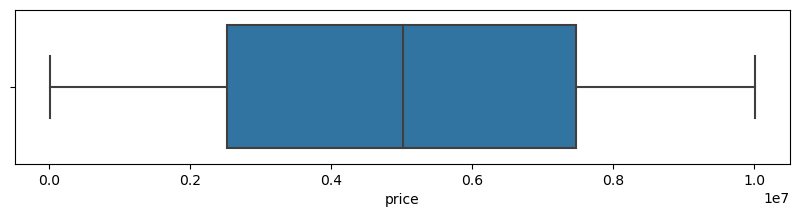

In [151]:
#checking for outliers for price
plt.figure(figsize=(10,2))

sns.boxplot(x = 'price', data = new_df)

# Display the plot
plt.show()

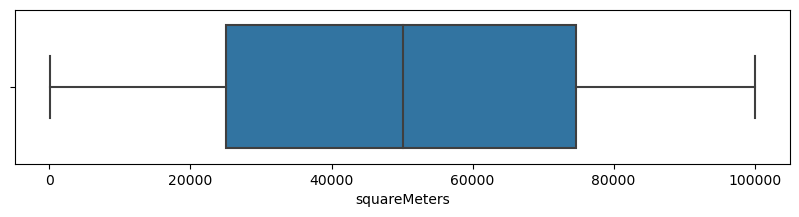

In [152]:
#checking for outliers for squareMeters
plt.figure(figsize=(10,2))

sns.boxplot(x = 'squareMeters', data = new_df)

# Display the plot
plt.show()

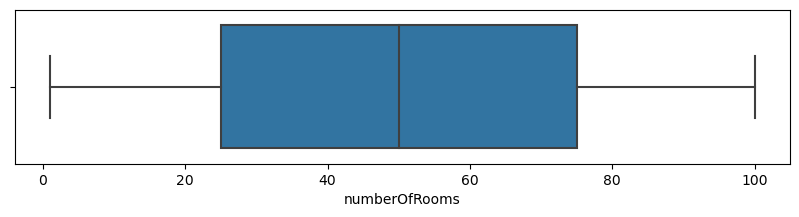

In [153]:
#checking for outliers for numberOfRooms
plt.figure(figsize=(10,2))

sns.boxplot(x = 'numberOfRooms', data = new_df)

# Display the plot
plt.show()

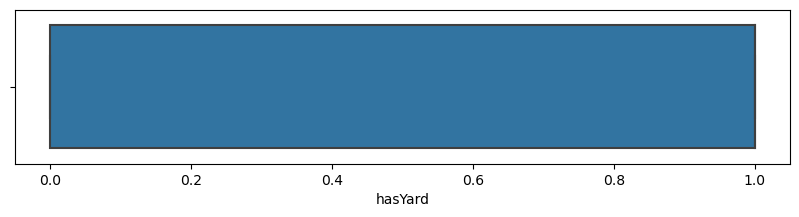

In [154]:
#checking for outliers for hasYard

plt.figure(figsize=(10,2))

sns.boxplot(x = 'hasYard', data = new_df)
# Display the plot
plt.show()

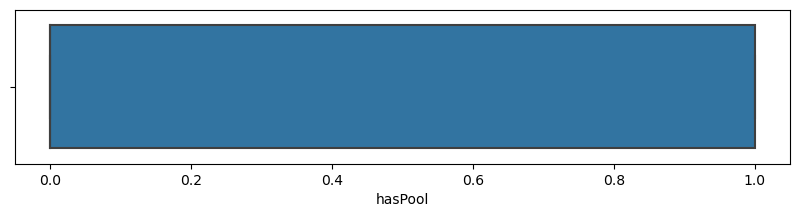

In [155]:
#checking for outliers for hasPool
plt.figure(figsize=(10,2))

sns.boxplot(x = 'hasPool', data = new_df)
# Display the plot
plt.show()

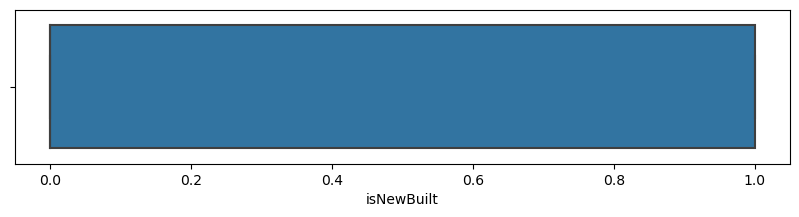

In [156]:
#checking for outliers for isNewBuilt
plt.figure(figsize=(10,2))

sns.boxplot(x = 'isNewBuilt', data = new_df)
# Display the plot
plt.show()

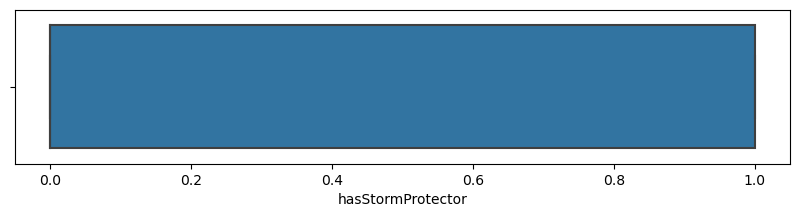

In [157]:
#checking for outliers for hasStormProtector
plt.figure(figsize=(10,2))

sns.boxplot(x = 'hasStormProtector', data = new_df)
# Display the plot
plt.show()

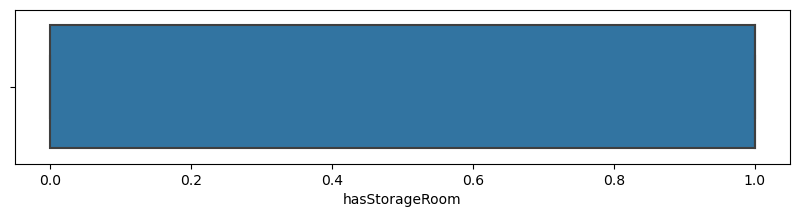

In [158]:
#checking for outliers for hasStorageRoom
plt.figure(figsize=(10,2))

sns.boxplot(x = 'hasStorageRoom', data = new_df)
# Display the plot
plt.show()

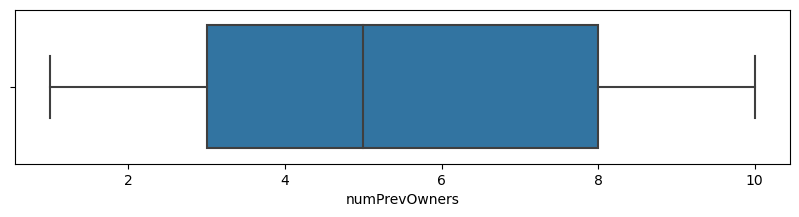

In [159]:
#checking for outliers for numPrevOwners

plt.figure(figsize=(10,2))

sns.boxplot(x = 'numPrevOwners', data = new_df)
# Display the plot
plt.show()

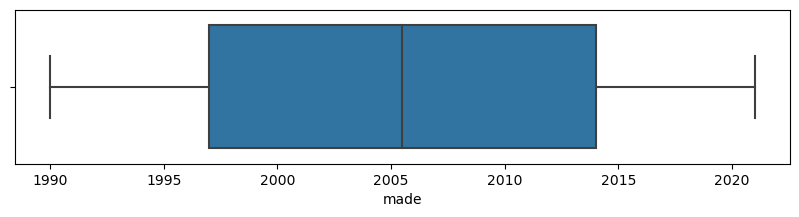

In [160]:
#checking for outliers for made
plt.figure(figsize=(10,2))

sns.boxplot(x = 'made', data = new_df)
# Display the plot
plt.show()

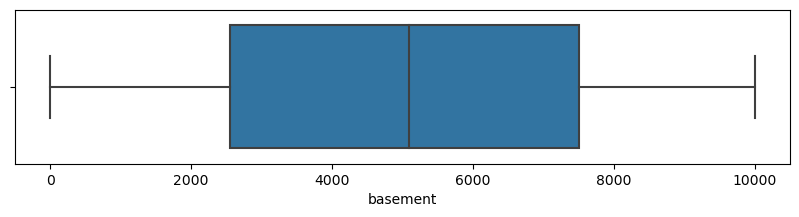

In [161]:
#checking for outliers for basement
plt.figure(figsize=(10,2))

sns.boxplot(x = 'basement', data = new_df)
# Display the plot
plt.show()

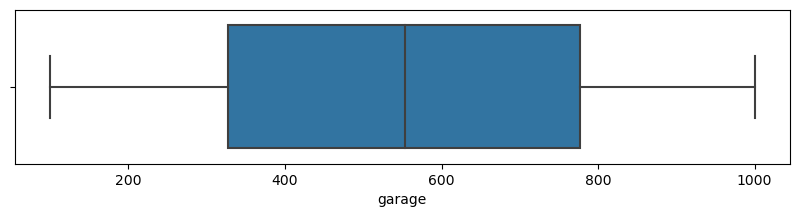

In [162]:
#checking for outliers for garage
plt.figure(figsize=(10,2))

sns.boxplot(x = 'garage', data = new_df)
# Display the plot
plt.show()

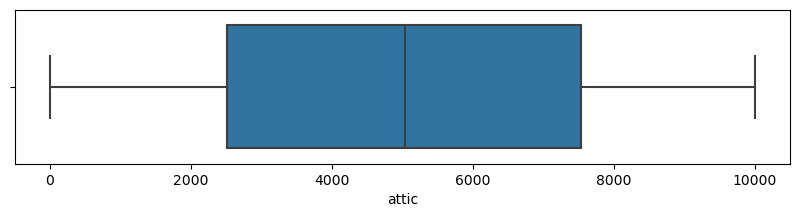

In [163]:
#checking for outliers for attic
plt.figure(figsize=(10,2))

sns.boxplot(x = 'attic', data = new_df)
# Display the plot
plt.show()

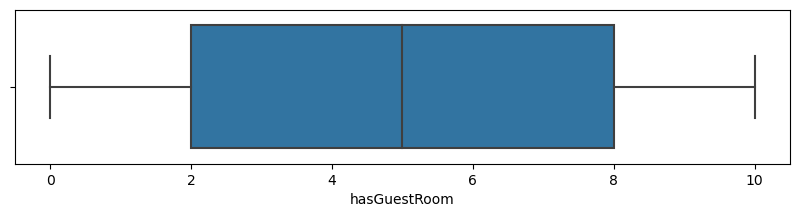

In [164]:
#checking for outliers for hasGuestRoom
plt.figure(figsize=(10,2))

sns.boxplot(x = 'hasGuestRoom', data = new_df)
# Display the plot
plt.show()

## Normalization and Scaling

In [165]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()
# Fitting and transforming the (new_df) data
scaled_new_df = scaler.fit_transform(new_df)
# Print the original and scaled data
print("Original Data:")
print(new_df)
print("\nScaled Data:")
print(scaled_new_df)


Original Data:
      squareMeters  numberOfRooms  hasYard  hasPool  floors  numPrevOwners  \
0            75523              3        0        1      63              8   
1            80771             39        1        1      98              6   
2            55712             58        0        1      19              8   
3            32316             47        0        0       6              4   
4            70429             19        1        1      90              7   
...            ...            ...      ...      ...     ...            ...   
9995          1726             89        0        1       5              6   
9996         44403             29        1        1      12              4   
9997         83841              3        0        0      69             10   
9998         59036             70        0        0      96              3   
9999          1440             84        0        0      49             10   

      made  isNewBuilt  hasStormProtector  basem

In [166]:
scaled_new_df

array([[0.75501952, 0.02020202, 0.        , ..., 0.        , 0.7       ,
        0.75514429],
       [0.80754679, 0.38383838, 1.        , ..., 1.        , 0.2       ,
        0.80785377],
       [0.55673106, 0.57575758, 0.        , ..., 1.        , 0.9       ,
        0.55663004],
       ...,
       [0.83827445, 0.02020202, 0.        , ..., 1.        , 0.9       ,
        0.83826864],
       [0.590001  , 0.6969697 , 0.        , ..., 1.        , 0.4       ,
        0.58968824],
       [0.01352217, 0.83838384, 0.        , ..., 1.        , 0.6       ,
        0.01364432]])

In [167]:
#assigning the columns to the scaled data for easier visualisation

new_df_columns = ['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors', 'numPrevOwners', 'made', 'isNewBuilt', 'hasStormProtector',
                      'basement', 'attic', 'garage', 'hasStorageRoom', 'hasGuestRoom', 'price']

scaled_df = pd.DataFrame(scaled_new_df, columns=new_df_columns)

scaled_df

,squareMeters,numberOfRooms,hasYard,hasPool,floors,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,0.755020,0.020202,0.0,1.0,0.626263,0.777778,0.483871,0.0,1.0,0.4313,0.900490,0.951111,0.0,0.7,0.755144
1,0.807547,0.383838,1.0,1.0,0.979798,0.555556,0.806452,1.0,0.0,0.3653,0.243524,0.031111,1.0,0.2,0.807854
2,0.556731,0.575758,0.0,1.0,0.181818,0.777778,1.000000,0.0,0.0,0.2937,0.885189,0.038889,1.0,0.9,0.556630
3,0.322560,0.464646,0.0,0.0,0.050505,0.333333,0.709677,0.0,1.0,0.0659,0.714071,0.287778,0.0,0.3,0.322339
4,0.704034,0.181818,1.0,1.0,0.898990,0.666667,0.000000,1.0,0.0,0.8435,0.242824,0.213333,1.0,0.4,0.704723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.016385,0.888889,0.0,1.0,0.040404,0.555556,0.612903,0.0,1.0,0.9311,0.169717,0.131111,0.0,0.4,0.016617
9996,0.443539,0.282828,1.0,1.0,0.111111,0.333333,0.000000,0.0,1.0,0.9061,0.174117,0.144444,0.0,0.0,0.443973
9997,0.838274,0.020202,0.0,0.0,0.686869,1.000000,0.483871,1.0,1.0,0.8304,0.772977,0.272222,1.0,0.9,0.838269
9998,0.590001,0.696970,0.0,0.0,0.959596,0.222222,0.645161,0.0,1.0,0.2590,0.617362,0.265556,1.0,0.4,0.589688


# Exploratory Data analysis

In [168]:
new_df.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


In [169]:
scaled_df.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.498260,0.498570,0.508700,0.496800,0.497740,0.502411,0.499629,0.499100,0.499900,0.503310,0.502751,0.503468,0.503000,0.499460,0.498490
std,0.288003,0.291078,0.499949,0.500015,0.291810,0.317407,0.300261,0.500024,0.500025,0.287673,0.289462,0.291167,0.500016,0.317641,0.287844
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250320,0.242424,0.000000,0.000000,0.242424,0.222222,0.225806,0.000000,0.000000,0.255975,0.251125,0.253056,0.000000,0.200000,0.250698
50%,0.500616,0.494949,1.000000,0.000000,0.494949,0.444444,0.500000,0.000000,0.000000,0.509250,0.504450,0.504444,1.000000,0.500000,0.500764
75%,0.745879,0.747475,1.000000,1.000000,0.757576,0.777778,0.774194,1.000000,1.000000,0.751125,0.754025,0.752500,1.000000,0.800000,0.746142
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


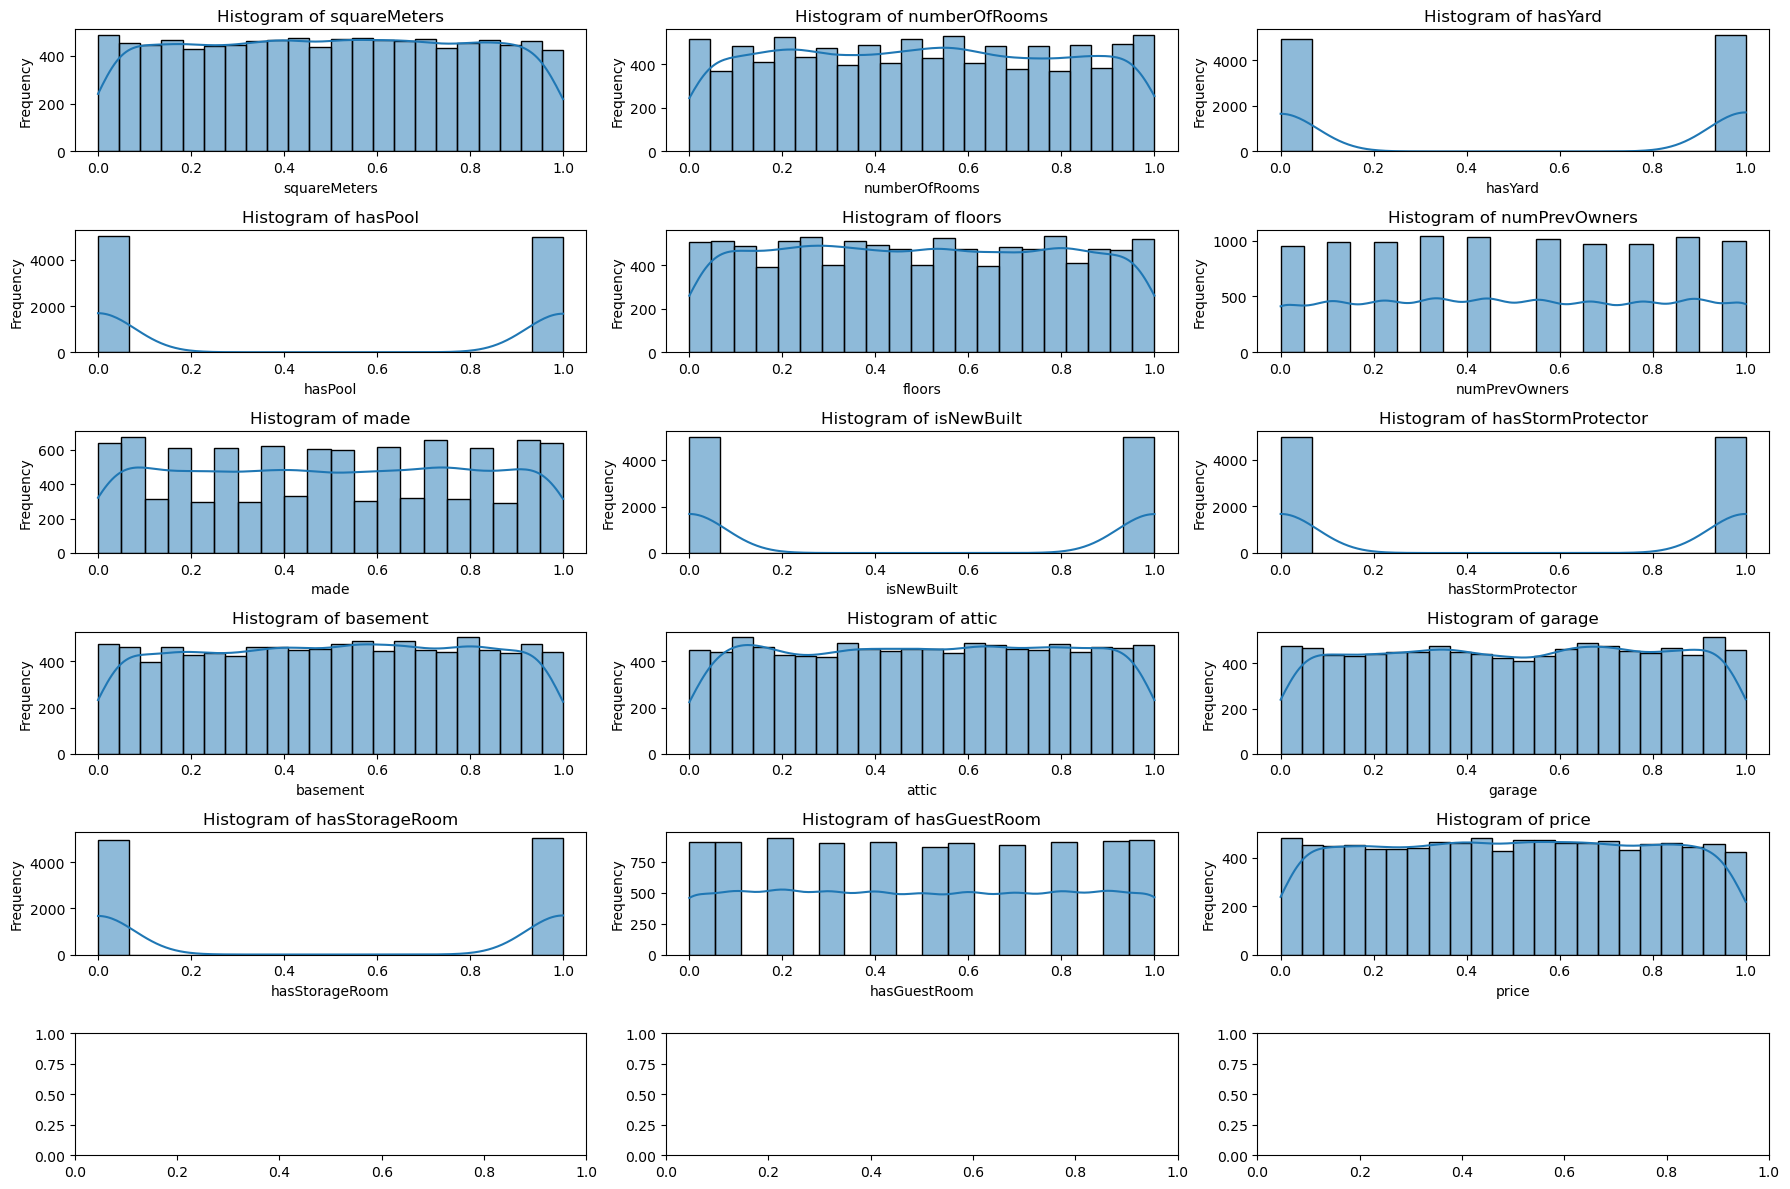

In [170]:
#distribution of the scaled data before transformation

fig, axes = plt.subplots(6, 3, figsize=(18, 12))

axes = axes.flatten()

for i, column in enumerate(scaled_df.columns):
    ax = axes[i]
    sns.histplot(scaled_df[column], kde=True, ax=ax)
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [171]:
#Transforming scaled_df from uniform distribution to normal distribution via QuantileTransformation
from sklearn.preprocessing import QuantileTransformer
from matplotlib import pyplot as plt
# Create an instance of QuantileTransformer
quantile_transformer = QuantileTransformer(output_distribution='normal')

transformed_df = quantile_transformer.fit_transform(scaled_df)
transformed_df = pd.DataFrame(transformed_df, columns=scaled_df.columns)
transformed_df

,squareMeters,numberOfRooms,hasYard,hasPool,floors,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,0.700432,-1.968165,-5.199338,5.199338,0.326900,0.667419,-0.037646,-5.199338,5.199338,-0.193331,1.275698,1.644369,-5.199338,0.468203,0.699882
1,0.880299,-0.287442,5.199338,5.199338,1.976943,0.129582,0.826698,5.199338,-5.199338,-0.368305,-0.697536,-1.837975,5.199338,-0.739737,0.880876
2,0.147787,0.205941,-5.199338,5.199338,-0.895780,0.667419,5.199338,-5.199338,-5.199338,-0.564687,1.186135,-1.738731,5.199338,1.088723,0.147295
3,-0.466026,-0.085414,-5.199338,-5.199338,-1.593219,-0.399276,0.520661,-5.199338,5.199338,-1.501970,0.553280,-0.567211,-5.199338,-0.462610,-0.468011
4,0.548840,-0.905189,5.199338,5.199338,1.258508,0.387078,-5.199338,5.199338,-5.199338,1.018927,-0.699980,-0.802226,5.199338,-0.221344,0.550951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-2.060847,1.192071,-5.199338,5.199338,-1.684464,0.129582,0.269184,-5.199338,5.199338,1.474064,-0.943585,-1.111702,-5.199338,-0.221344,-2.069527
9996,-0.140709,-0.558392,5.199338,5.199338,-1.194628,-0.399276,-5.199338,-5.199338,5.199338,1.313369,-0.926546,-1.053106,-5.199338,-5.199338,-0.140279
9997,1.002409,-1.968165,-5.199338,-5.199338,0.490721,5.199338,-0.037646,5.199338,5.199338,0.964280,0.738089,-0.613509,5.199338,1.088723,1.001929
9998,0.233127,0.529301,-5.199338,-5.199338,1.669112,-0.695908,0.349483,-5.199338,5.199338,-0.662268,0.283319,-0.633317,5.199338,-0.221344,0.231598


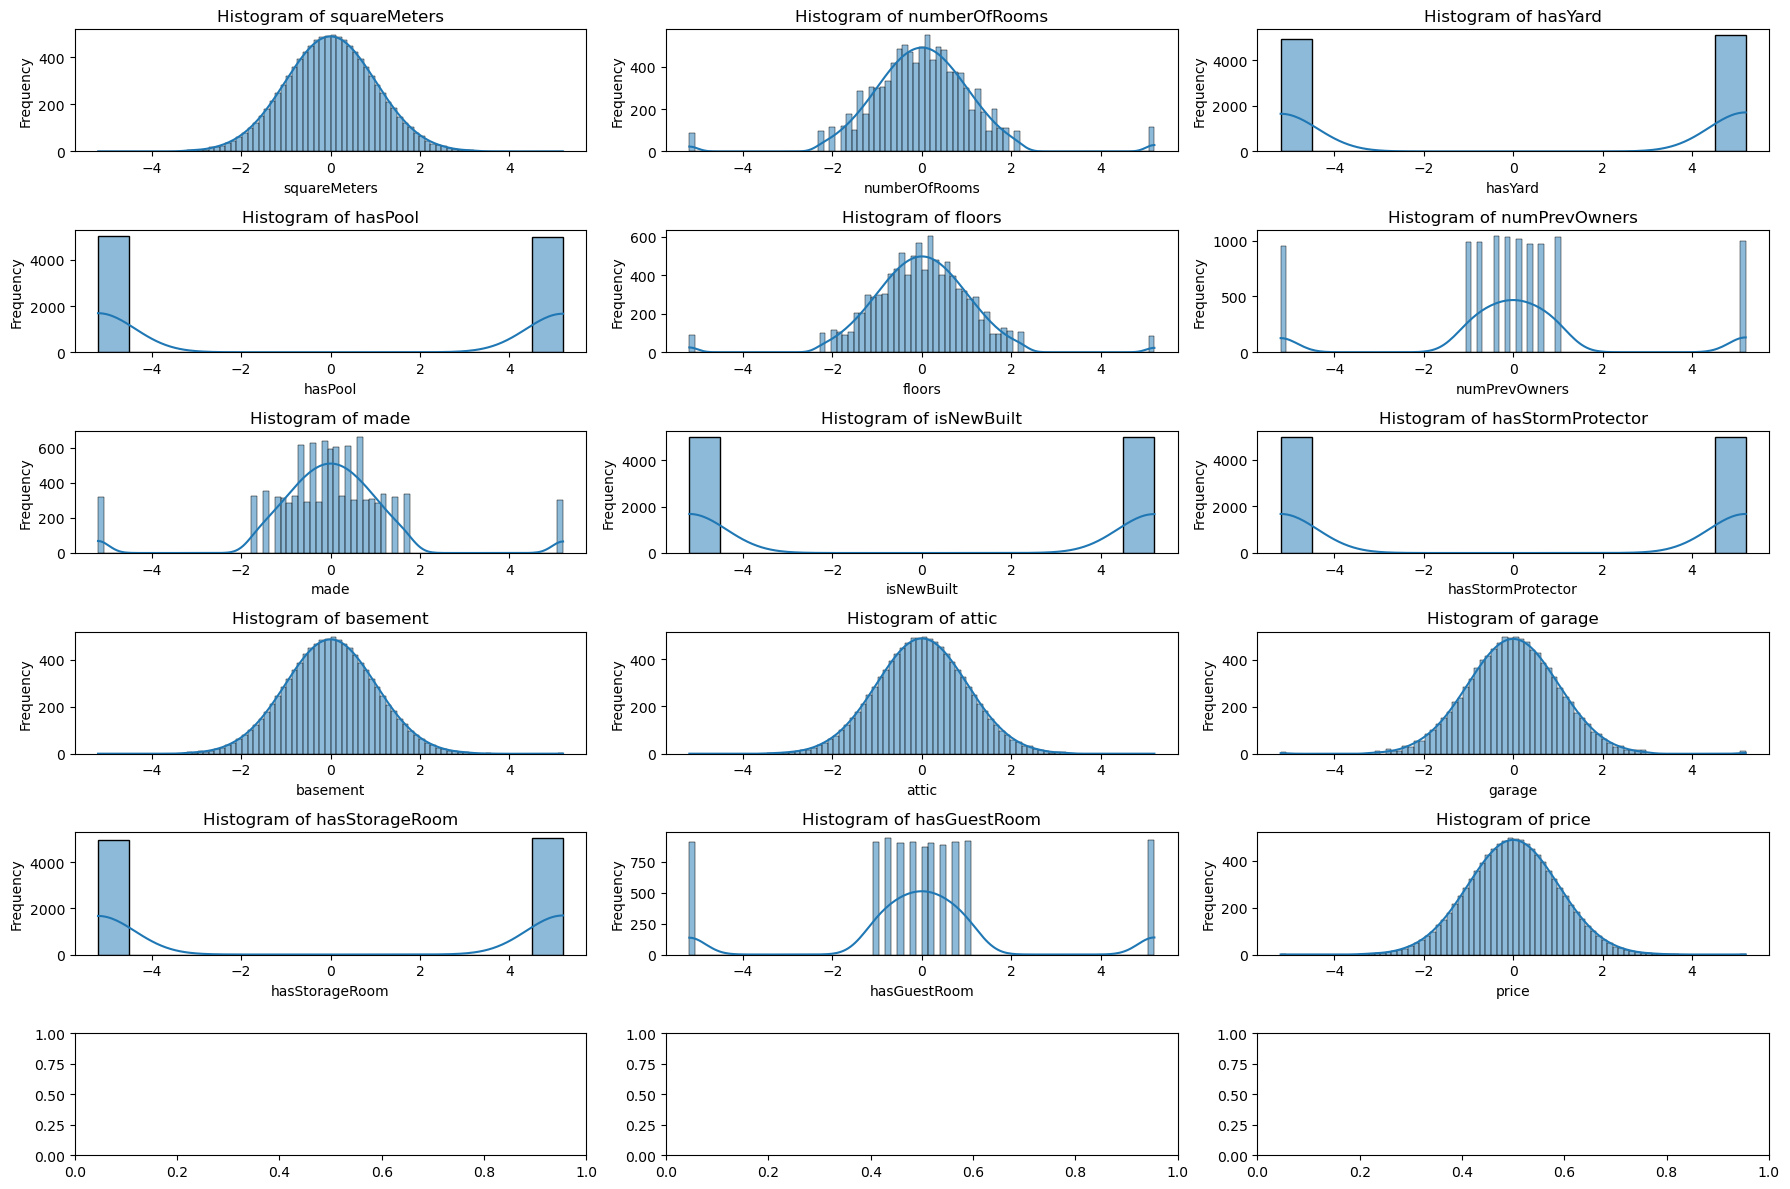

In [172]:
#Normal distributed data
fig, axes = plt.subplots(6, 3, figsize=(18, 12))

axes = axes.flatten()

for i, column in enumerate(transformed_df.columns):
    ax = axes[i]
    sns.histplot(transformed_df[column], kde=True, ax=ax)
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

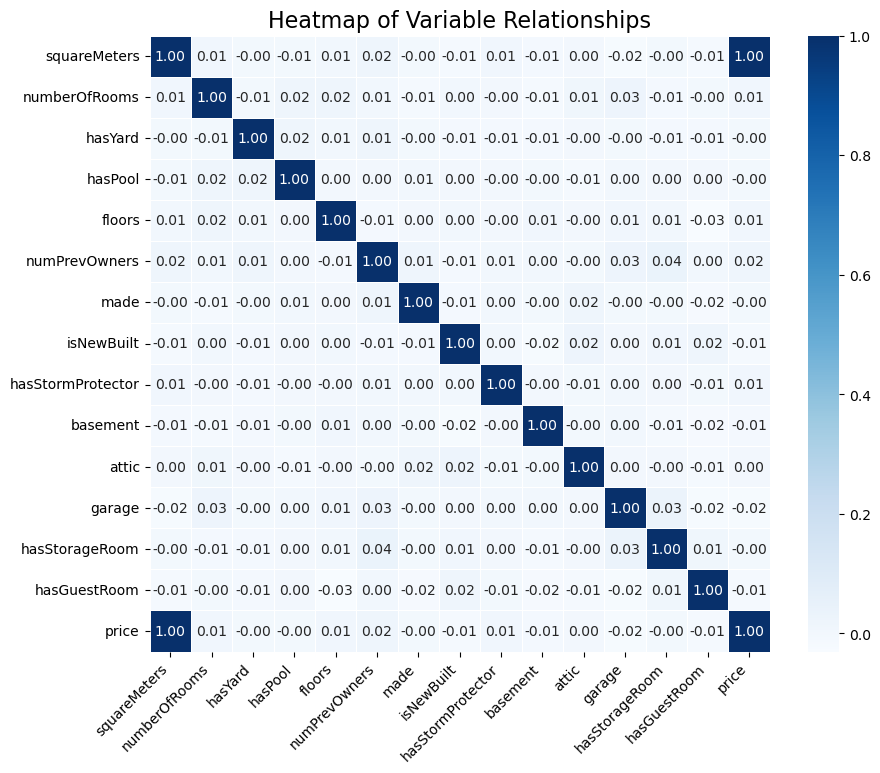

In [173]:
correlation_matrix = transformed_df.corr()

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)

heatmap.set_title('Heatmap of Variable Relationships', fontsize=16)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

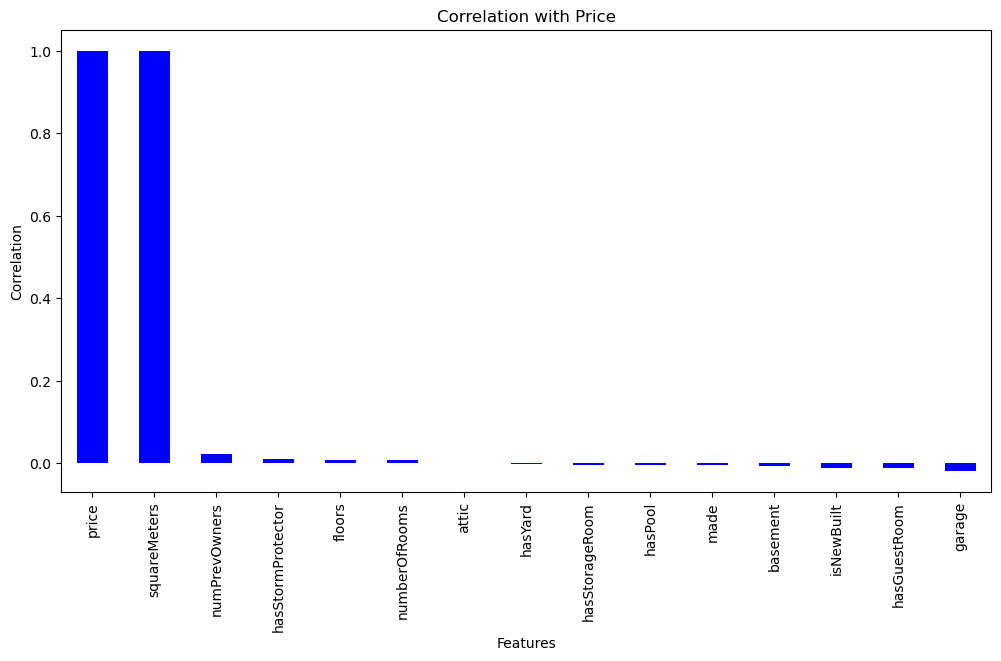

In [174]:
correlation_with_price =  transformed_df.corr()['price'].sort_values(ascending=False)

correlation_with_price.plot(kind='bar', figsize=(12, 6), color='blue')
plt.title('Correlation with Price')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()

## Using training and testing sets by splitting the dataset

Splitting the dataset into training and testing sets

In [175]:
from sklearn.model_selection import train_test_split
# Specify the features (X) and the target variable (y)
X = transformed_df.drop('price', axis=1)
y = transformed_df['price']

# Split the dataset into training and testing sets
# The test_size parameter specifies the proportion of the dataset to include in the test split (here, 20%)
# The random_state parameter ensures reproducibility by fixing the random seed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you can use X_train and y_train for training your model
# and X_test and y_test for evaluating its performance
X_test

,squareMeters,numberOfRooms,hasYard,hasPool,floors,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
6252,0.836352,-1.509656,5.199338,-5.199338,0.278302,-1.059682,-0.814401,5.199338,5.199338,-0.444978,0.695908,1.171890,5.199338,-1.093272
4684,-0.334471,0.795322,5.199338,5.199338,1.111702,-0.695908,1.407905,5.199338,-5.199338,0.149210,0.915069,-1.467860,-5.199338,0.005018
1731,1.077051,-0.369558,5.199338,-5.199338,-0.149853,0.387078,-1.391202,-5.199338,5.199338,0.439208,0.247701,0.387078,5.199338,0.468203
4742,0.373514,-0.530745,5.199338,5.199338,0.128317,-0.128317,-1.391202,5.199338,-5.199338,2.016335,0.274934,-0.079120,5.199338,-5.199338
4521,0.384407,1.192071,5.199338,5.199338,0.461215,-1.059682,1.407905,-5.199338,-5.199338,-0.870854,0.935242,-0.160010,-5.199338,5.199338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6412,0.520327,-1.968165,5.199338,5.199338,0.517790,0.129582,-1.391202,-5.199338,5.199338,-0.909607,-1.625993,-0.718462,-5.199338,0.230353
8285,0.903943,1.192071,5.199338,-5.199338,0.945616,-0.399276,0.113152,5.199338,-5.199338,-0.208150,-0.336262,-0.074087,5.199338,5.199338
7853,-0.859401,-0.791884,5.199338,-5.199338,0.200818,5.199338,1.210137,5.199338,-5.199338,-1.080287,-0.590488,-0.468116,5.199338,0.005018
1095,-0.547553,-0.216204,5.199338,-5.199338,-0.125788,0.387078,-0.193143,5.199338,-5.199338,-1.855931,-0.715218,-1.210137,5.199338,1.088723


Training the model using the training set

In [176]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Create a linear regression model
model = LinearRegression()

# Train the model using the training set
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')
# The model is now trained and can be used for making predictions

Mean Squared Error: 0.0001054262073656438
R-squared Score: 0.9999047597342531


OLS regression summary

In [177]:
results_1 = smf.ols('price ~ squareMeters', data = transformed_df).fit()
results_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.898e+08
Date:                Sat, 03 Feb 2024   Prob (F-statistic):               0.00
Time:                        00:44:04   Log-Likelihood:                 35053.
No. Observations:               10000   AIC:                        -7.010e+04
Df Residuals:                    9998   BIC:                        -7.009e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.112e-07   7.27e-05      0.002      0.999      -0.000       0.000
squareMeters     1.0004   7.26e-05   1.38e+04      0.000       1.000       1.001
==============================================================================
Omnibus:                    11253.461   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         89153635.721
Skew:                           4.371   Prob(JB):                         0.00
Kurtosis:                     465.485   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Using two variables for train and test sets

In [178]:
from sklearn.metrics import mean_squared_error

# Step 1 : split the data into train and test sets

train_data,test_data=train_test_split(transformed_df,train_size=0.8,random_state=3)

# Step 2 : Train the model on the Training set
reg=LinearRegression()

x_train=np.array(train_data['squareMeters']).reshape(-1,1)

y_train=np.array(train_data['price']).reshape(-1,1)

reg.fit(x_train,y_train)

# Step 3 : Predict the test results

x_test=np.array(test_data['squareMeters']).reshape(-1,1)

y_test=np.array(test_data['price']).reshape(-1,1)
print('R squared training',round(reg.score(x_train,y_train),3))

print('R squared testing',round(reg.score(x_test,y_test),3) )

print('intercept',reg.intercept_)

print('coefficient',reg.coef_)

R squared training 1.0
R squared testing 1.0
intercept [2.27299494e-05]
coefficient [[1.00034209]]


#### Intercept and Coefficient interpretation:
The intercept is 2.27299494e-05 , and the coefficient for the independent variable is 1.00034209.
This suggests that the model is a perfect fit to the data, and it predicts the dependent variable (price) based on the independent variable 
(squareMeters) with very high accuracy. The coefficient for squareMeters is very close to 1, indicating a strong positive linear relationship 
between the independent and dependent variables.


In [179]:
from statsmodels.stats.anova import anova_lm

# Hypothesis Testing for Multiple Variables Influence on Price
m_1 = 'price ~ basement + numberOfRooms + squareMeters + attic + garage'
result3 = smf.ols(m_1, data=transformed_df).fit()

anova_table = anova_lm(result3)

alpha = 0.05  # significance level

if anova_table['PR(>F)']['basement'] < alpha and anova_table['PR(>F)']['numberOfRooms'] < alpha \
    and anova_table['PR(>F)']['squareMeters'] < alpha and anova_table['PR(>F)']['attic'] < alpha \
    and anova_table['PR(>F)']['garage'] < alpha:
    print("Reject the null hypothesis: The combination of variables significantly influences the price.")
else:
    print("Do not reject the null hypothesis: The combination of variables does not significantly influence the price.")

Do not reject the null hypothesis: The combination of variables does not significantly influence the price.


In [180]:
from scipy.stats import linregress

# Hypothesis Testing for Square Meters and Price Relationship
slope, intercept, r_value, p_value, std_err = linregress(transformed_df['squareMeters'], transformed_df['price'])

alpha = 0.05  # significance level

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant linear relationship between square meters and price.")
else:
    print("Fail to reject the null hypothesis: There is no significant linear relationship between square meters and price.")

Reject the null hypothesis: There is a significant linear relationship between square meters and price.


## Plotting the Predicted Regression line for two variables.

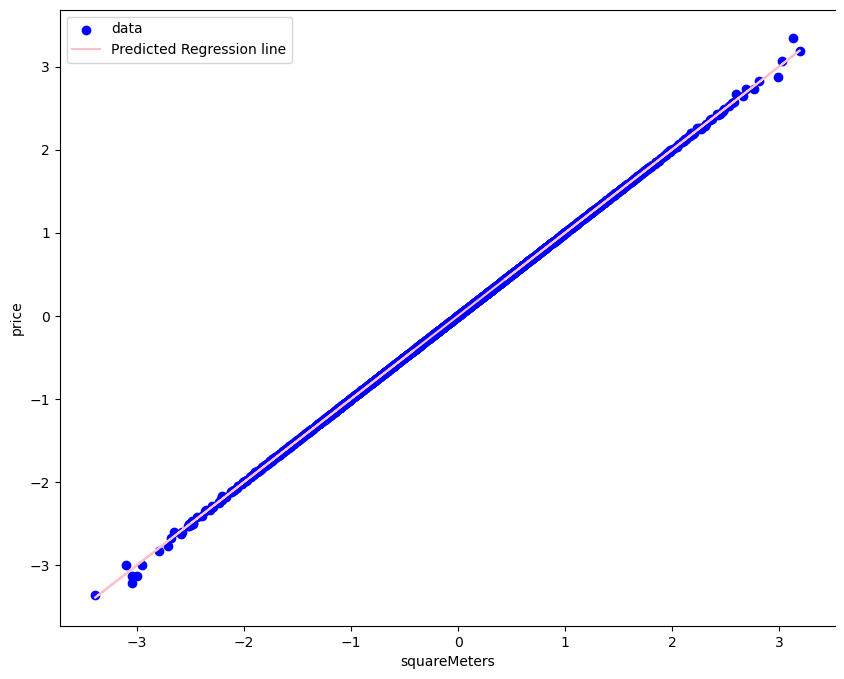

In [181]:
_, ax = plt.subplots(figsize= (10, 8))

plt.scatter(x_test, y_test, color= 'blue', label = 'data')

plt.plot(x_test, reg.predict(x_test), color='pink', label= 'Predicted Regression line')

plt.xlabel('squareMeters')
plt.ylabel('price')
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

Summary of regression results between multiple variables.

In [182]:
m_1 = 'price ~ basement + numberOfRooms + squareMeters + attic + garage'

result3 = smf.ols(m_1, data = transformed_df).fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.797e+07
Date:                Sat, 03 Feb 2024   Prob (F-statistic):               0.00
Time:                        00:44:05   Log-Likelihood:                 35056.
No. Observations:               10000   AIC:                        -7.010e+04
Df Residuals:                    9994   BIC:                        -7.006e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.988e-07   7.27e-05     -0.004

Predicted regression line for multiple variables

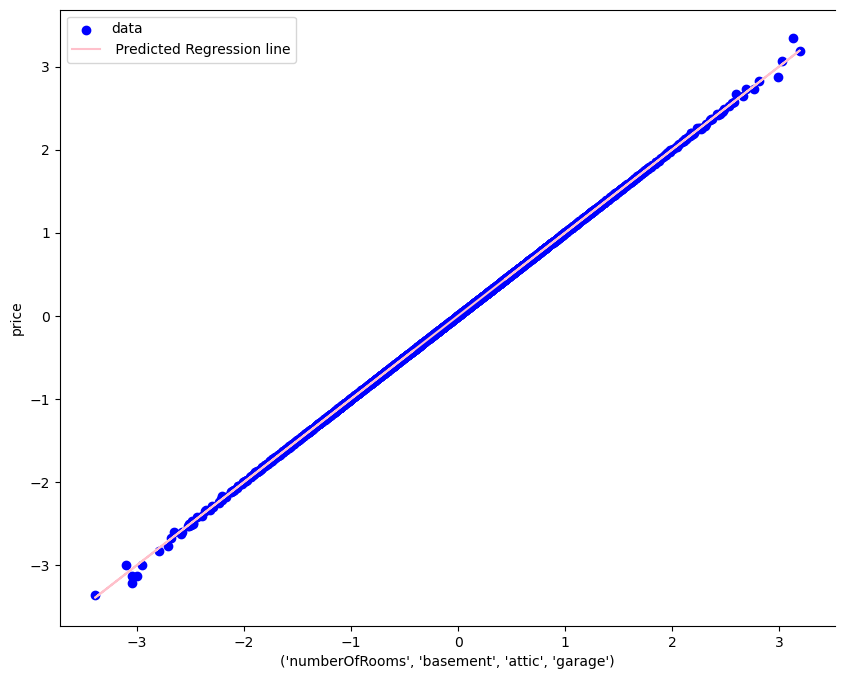

In [183]:
_, ax = plt.subplots(figsize= (10, 8))

plt.scatter(x_test, y_test, color= 'blue', label = 'data')

plt.plot(x_test, reg.predict(x_test), color='pink', label= ' Predicted Regression line')

plt.xlabel(((('numberOfRooms', 'basement','attic', 'garage'))))
plt.ylabel('price')
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

## Visualizing the model's predictions and comparing them to the actual values

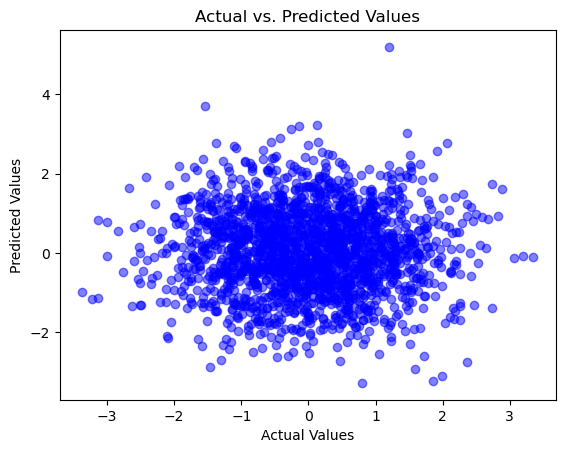

In [184]:
# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

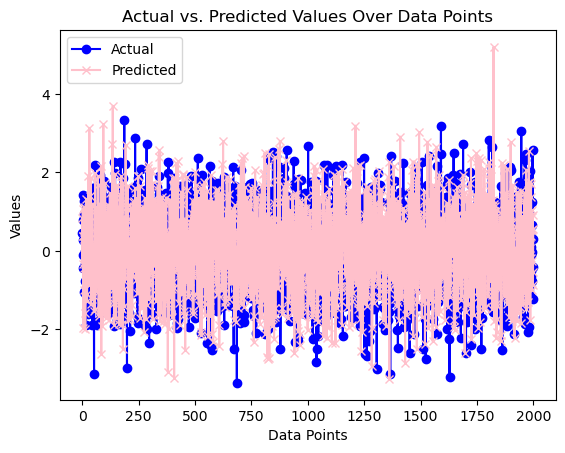

In [185]:
# Line plot of actual vs. predicted values
plt.plot(y_test, label='Actual', marker='o', color='blue')
plt.plot(y_pred, label='Predicted', marker='x', color='pink')
plt.title('Actual vs. Predicted Values Over Data Points')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()
plt.show()

# Summary and Conclusion

The comprehensive analysis conducted by Mali Safi and Sons serves as a pivotal guide for the Distinguished Group of Parisian Investors venturing into the real estate sector. The significance of the models lies in their ability to offer nuanced insights, predictive accuracy, and strategic guidance tailored to the unique dynamics of the Paris housing market.

In culmination with the formulated hypothesis that intrinsically correlates to the models created and clear insight that influences the clear decision-making process of the Distinguished group Investors.

The models, developed through meticulous data analysis, not only identify key variables i.e ('numberOfRooms', 'basement','attic', 'garage') influencing property prices but also provide a robust framework for predictive modeling. These tools enable Mali Safi and Sons to offer valuable guidance to the investors, informing their decisions on strategic investments, risk mitigation, and the development of tailored solutions to address the pressing issue of affordable housing.

By delving into the relationships between various features and property prices, e.g take a look at the price for a house with 83841sqmeters which is 8390030.5. The models empower the investors to navigate the intricacies of the market with a data-driven approach. Statistical significance achieved through hypothesis testing adds credibility to the insights derived, ensuring that the investors can make informed decisions based on a solid foundation of analysis.From the models, both the R-squared and the adjusted R-squared eaquals to 1 which proofs a perfect regression and both models show a significant linear relationship between the variables and the property prices.

Furthermore, the models facilitate effective communication of complex insights, allowing Mali Safi and Sons to convey the significance of variables and market trends to the investors in a clear and actionable manner. In essence, these analytical tools not only serve as predictive instruments but also as strategic enablers, guiding the Distinguished Group of Parisian Investors towards well-informed and strategic decisions in the realm of real estate.